In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end   = '2022-04-30'

df = data.DataReader('TSLA', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-25,1008.619995,975.299988,978.969971,998.020020,22780400.0,998.020020
2022-04-26,1000.000000,875.000000,995.429993,876.419983,45377900.0,876.419983
2022-04-27,918.000000,877.359985,898.580017,881.510010,25652100.0,881.510010
2022-04-28,900.000000,821.700012,899.979980,877.510010,41649500.0,877.510010
2022-04-29,934.400024,870.000000,902.250000,870.760010,29313400.0,870.760010


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [5]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,5.000,3.508,3.800,4.778,93831500.0
1,6.084,4.660,5.158,4.766,85935500.0
2,5.184,4.054,5.000,4.392,41094000.0
3,4.620,3.742,4.600,3.840,25699000.0
4,4.000,3.166,4.000,3.222,34334500.0


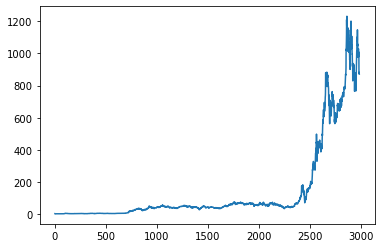

In [6]:
plt.plot(df.Close)

In [7]:
#Determining the moving average
mov_avg_100 = df.Close.rolling(100).mean()
mov_avg_100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2976    967.900394
2977    965.714594
2978    963.683694
2979    962.309095
2980    960.926595
Name: Close, Length: 2981, dtype: float64

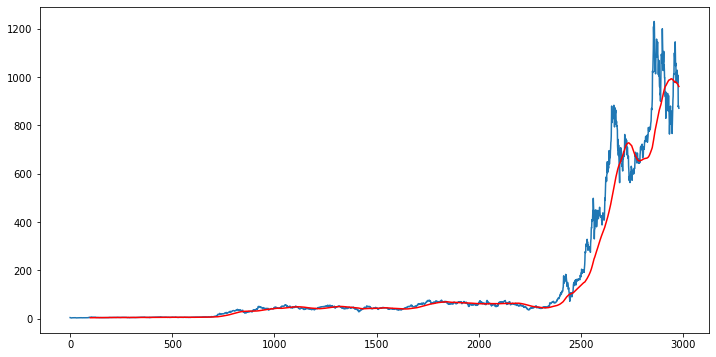

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mov_avg_100,'r')

In [9]:
mov_avg_200 = df.Close.rolling(200).mean()
mov_avg_200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2976    899.943246
2977    900.896846
2978    901.961696
2979    903.082346
2980    904.183146
Name: Close, Length: 2981, dtype: float64

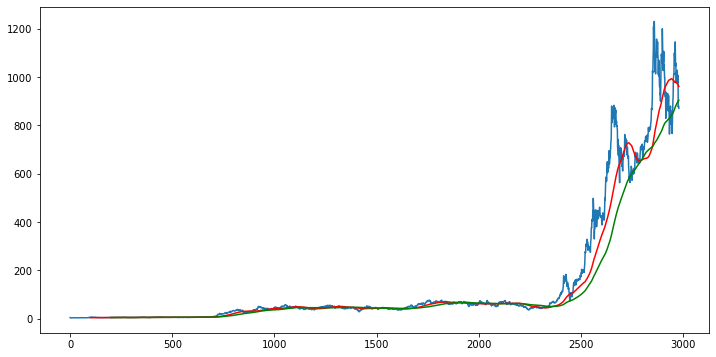

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mov_avg_100,'r')
plt.plot(mov_avg_200,'g')

In [11]:
df.shape

(2981, 5)

In [13]:
#Splitiing data into training and testing

df_train = pd.DataFrame(df['Close'][0:int(len(df)*0.60)])
df_test = pd.DataFrame(df['Close'][int(len(df)*0.60): int(len(df))])
print(df_train.shape)
print(df_test.shape)
                    
    

(1788, 1)
(1193, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
df_train_array = scaler.fit_transform(df_train)
df_train_array 

array([[0.02200462],
       [0.02184142],
       [0.01675507],
       ...,
       [0.82624778],
       [0.84343804],
       [0.90110155]])

In [16]:
x_train = []
y_train = []

#Time series analysis analogy(Values depend upon the previous days values)
for i in range(100, df_train_array.shape[0]):
    x_train.append(df_train_array[i-100: i])
    y_train.append(df_train_array[i , 0])

x_train



[array([[0.02200462],
        [0.02184142],
        [0.01675507],
        [0.00924792],
        [0.00084319],
        [0.        ],
        [0.00451516],
        [0.00435196],
        [0.00339997],
        [0.00636475],
        [0.01098871],
        [0.01112471],
        [0.01316469],
        [0.01661906],
        [0.0122399 ],
        [0.0120223 ],
        [0.01414388],
        [0.01493268],
        [0.01400789],
        [0.0129199 ],
        [0.01338229],
        [0.0123759 ],
        [0.01126071],
        [0.01392629],
        [0.01672786],
        [0.01485108],
        [0.0126479 ],
        [0.01030872],
        [0.01033592],
        [0.00878553],
        [0.00571195],
        [0.00489596],
        [0.00685434],
        [0.00810553],
        [0.00911192],
        [0.00807833],
        [0.00813273],
        [0.00897593],
        [0.0117775 ],
        [0.00924792],
        [0.01115191],
        [0.01074391],
        [0.01060791],
        [0.01107031],
        [0.01000952],
        [0

In [18]:
x_train.shape()

AttributeError: 'list' object has no attribute 'shape'

In [19]:
x_train, y_train = np.array(x_train),np.array(y_train)

In [20]:
#ML model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
         input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))




model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


2022-05-03 12:20:22.237242: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
53/53 [==============================] - 3s 32ms/step - loss: 0.0210
Epoch 2/50
53/53 [==============================] - 2s 31ms/step - loss: 0.0058
Epoch 3/50
53/53 [==============================] - 2s 31ms/step - loss: 0.0056
Epoch 4/50
53/53 [==============================] - 2s 33ms/step - loss: 0.0047
Epoch 5/50
53/53 [==============================] - 2s 32ms/step - loss: 0.0046
Epoch 6/50
53/53 [==============================] - 2s 34ms/step - loss: 0.0047
Epoch 7/50
53/53 [==============================] - 2s 35ms/step - loss: 0.0044
Epoch 8/50
53/53 [==============================] - 2s 35ms/step - loss: 0.0038
Epoch 9/50
53/53 [==============================] - 2s 34ms/step - loss: 0.0038
Epoch 10/50
53/53 [==============================] - 2s 33ms/step - loss: 0.0039
Epoch 11/50
53/53 [==============================] - 2s 34ms/step - loss: 0.0036
Epoch 12/50
53/53 [==============================] - 2s 34ms/step - loss: 0.0037
Epoch 13/50
53/53 [==================

In [23]:
model.save('keras_model_close.h5')

In [24]:
#Getting the values of the past 100 days for testing
past_100_days = df_train.tail(100)

In [25]:
final_df = past_100_days.append(df_test, ignore_index = True)

In [26]:
final_df.head()

,Close
0,51.599998
1,51.146000
2,52.410000
3,52.299999
4,52.383999


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01323657],
       [0.01285637],
       [0.0139149 ],
       ...,
       [0.70823604],
       [0.70488628],
       [0.69923356]])

In [28]:
input_data.shape

(1293, 1)

In [29]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [30]:
 x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(1193, 100, 1)
(1193,)


In [31]:
#Prediction making

y_predict = model.predict(x_test)

In [32]:
#Scaling them up and comparing

scaler.scale_

array([0.00083744])

In [33]:
scale_factor = 1/0.00083744
y_predict = y_predict *scale_factor
y_test = y_test * scale_factor

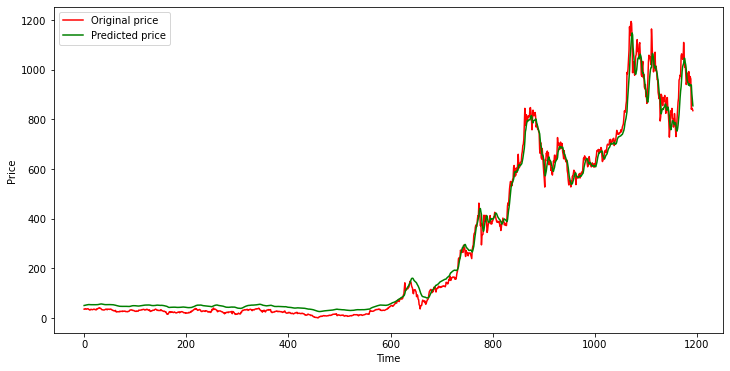

In [34]:
plt.figure(figsize =(12,6))
plt.plot(y_test, 'r', label = 'Original price')
plt.plot(y_predict, 'g', label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

